This file cleans android and ios by removing outlier values from `eventGPSSignalStrength`, `eventStartSpeed`, `eventEndSpeed`. It creates a new feature called `aggressive` which indicates the row is aggressive driving based on the `eventDuration` and `speedGap` features.

In [1]:
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "raw").exists())

iOS_raw = pd.read_csv(root / "data" / "raw" / "ios_turns.csv", header=0)
android_raw = pd.read_csv(root / "data" / "raw" / "android_turns.csv", header=0)

In [3]:
android_raw.shape

(1287, 34)

In [4]:
iOS_raw.shape

(61094, 34)

In [5]:
android_raw.head()

,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,...,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean
0,1.172144e+08,1,1,670340.75,677584.90,4,10.394929,7.244125,0.016991,41.774303,...,0.738191,0.800598,0.854956,8.662511,9.521707,67.59688,69.319600,22.941639,20.335337,1
1,1.172144e+08,1,1,250180.31,257678.03,4,9.401910,7.497719,0.016103,41.802270,...,0.926223,1.051501,1.147173,9.708605,11.245602,80.07132,84.723694,20.737572,21.819538,1
2,1.122337e+09,1,1,852694.94,860628.70,4,6.750588,7.933750,0.012202,41.822826,...,1.197002,1.415529,1.806123,20.356073,2.534807,249.20390,20.211075,18.100092,8.500866,1
3,1.122337e+09,1,1,778673.60,783632.25,5,10.084871,4.958625,0.014104,41.822826,...,1.343501,2.203393,4.873099,16.093168,4.245962,162.20609,21.221228,20.195393,14.847904,1
4,1.122337e+09,1,1,711669.90,716628.94,4,5.592350,4.959063,0.009630,41.822876,...,2.485116,2.862883,3.406215,29.804018,1.212521,295.70374,6.061072,209.791600,3.592705,1


In [6]:
iOS_raw.head()

,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,...,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean
0,1.713042e+12,1.0,1.0,479553.47,484875.20,4.0,8.553064,5.321719,0.014196,41.966473,...,0.917817,1.414616,1.659606,14.507535,17.503620,72.763930,93.844490,5.143511,20.190279,1.0
1,1.713042e+12,1.0,1.0,459179.94,464064.80,4.0,9.360758,4.884875,0.012575,41.966442,...,0.298834,0.323955,2.006506,6.688964,7.615370,28.435398,37.502575,21.282076,56.273140,1.0
2,1.713042e+12,1.0,1.0,448020.16,456677.90,5.0,10.681455,8.657750,0.021795,41.966310,...,0.404701,0.639127,0.752962,4.451903,6.722845,42.455890,58.471710,61.868423,60.049355,1.0
3,1.713042e+12,1.0,1.0,427011.25,434835.00,5.0,10.399240,7.823751,0.016130,41.966670,...,0.000000,0.135585,6.447024,12.498045,12.015339,97.785550,94.482200,11.925367,inf,1.0
4,1.713042e+12,1.0,1.0,395398.60,402547.22,4.0,8.345368,7.148625,0.017785,41.968548,...,0.908760,0.968915,1.698010,10.938344,11.460243,35.474804,82.380120,8.483684,16.327477,1.0


/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_49922/1467067716.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


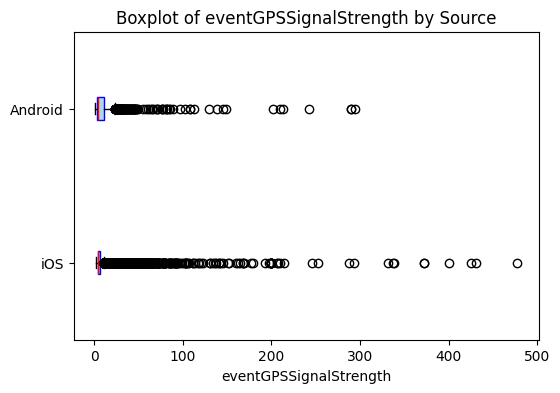

In [7]:
# Analyze eventGPSSignalStrength for Android
plt.figure(figsize=(6,4))
android_data = android_raw['eventGPSSignalStrength']
ios_data = iOS_raw['eventGPSSignalStrength']

plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of eventGPSSignalStrength by Source")
plt.xlabel("eventGPSSignalStrength")
plt.show()


/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_49922/2336716558.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_filtered['eventGPSSignalStrength'], android_filtered['eventGPSSignalStrength']],


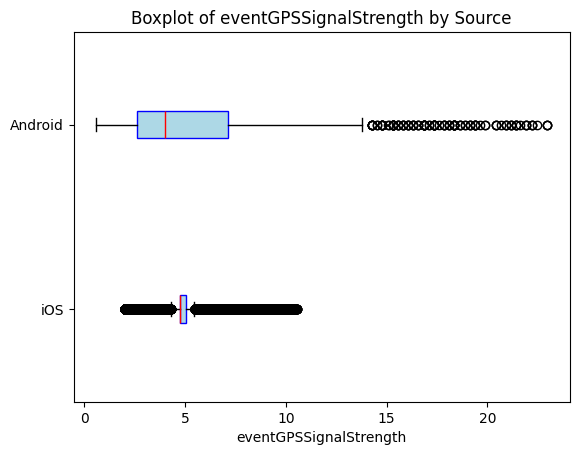

In [8]:
# drop columns with too weak of a signal

# Apply IQR filter 
def filter_by_gps_signal(df_raw, col="eventGPSSignalStrength"):
    s = df_raw[col].dropna()
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    mask = df_raw[col].notna() & (df_raw[col] <= upper) & (df_raw[col] >= 0)
    return df_raw[mask].copy(), upper

android_filtered, android_upper = filter_by_gps_signal(android_raw)
ios_filtered, ios_upper = filter_by_gps_signal(iOS_raw)

plt.boxplot([ios_filtered['eventGPSSignalStrength'], android_filtered['eventGPSSignalStrength']],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of eventGPSSignalStrength by Source")
plt.xlabel("eventGPSSignalStrength")
plt.show()


In [9]:
android_filtered.head()

,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,...,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean
0,1.172144e+08,1,1,670340.750,677584.900,4,10.394929,7.244125,0.016991,41.774303,...,0.738191,0.800598,0.854956,8.662511,9.521707,67.596880,69.319600,22.941639,20.335337,1
1,1.172144e+08,1,1,250180.310,257678.030,4,9.401910,7.497719,0.016103,41.802270,...,0.926223,1.051501,1.147173,9.708605,11.245602,80.071320,84.723694,20.737572,21.819538,1
6,1.122337e+09,1,1,604877.000,609121.560,5,11.290954,4.244563,0.008359,41.822420,...,1.083567,1.494703,1.494703,11.732657,24.616348,44.000920,105.462135,18.996666,29.467962,1
8,1.122337e+09,1,1,284234.220,287407.720,5,12.743101,3.173500,0.007654,41.817780,...,1.748773,1.770240,1.770240,10.335592,17.929585,45.601433,57.610783,23.959110,21.440578,1
12,1.122337e+09,1,1,37649.457,43639.777,5,8.986107,5.990321,0.013587,41.802822,...,0.266539,1.698927,2.619599,11.501888,2.787075,74.401410,16.806042,91.713660,12.708904,1


In [10]:
ios_filtered.head()

,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,...,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean
0,1.713042e+12,1.0,1.0,479553.47,484875.20,4.0,8.553064,5.321719,0.014196,41.966473,...,0.917817,1.414616,1.659606,14.507535,17.503620,72.763930,93.844490,5.143511,20.190279,1.0
1,1.713042e+12,1.0,1.0,459179.94,464064.80,4.0,9.360758,4.884875,0.012575,41.966442,...,0.298834,0.323955,2.006506,6.688964,7.615370,28.435398,37.502575,21.282076,56.273140,1.0
2,1.713042e+12,1.0,1.0,448020.16,456677.90,5.0,10.681455,8.657750,0.021795,41.966310,...,0.404701,0.639127,0.752962,4.451903,6.722845,42.455890,58.471710,61.868423,60.049355,1.0
3,1.713042e+12,1.0,1.0,427011.25,434835.00,5.0,10.399240,7.823751,0.016130,41.966670,...,0.000000,0.135585,6.447024,12.498045,12.015339,97.785550,94.482200,11.925367,inf,1.0
4,1.713042e+12,1.0,1.0,395398.60,402547.22,4.0,8.345368,7.148625,0.017785,41.968548,...,0.908760,0.968915,1.698010,10.938344,11.460243,35.474804,82.380120,8.483684,16.327477,1.0


In [11]:
print(android_filtered.shape[0] / android_raw.shape[0] * 100, "% of android data retained after IQR filtering")
print(ios_filtered.shape[0] / iOS_raw.shape[0] * 100, "% of ios data retained after IQR filtering")
android_df = android_filtered.copy()
ios_df = ios_filtered.copy()
del android_filtered
del ios_filtered

89.1996891996892 % of android data retained after IQR filtering
91.10878318656496 % of ios data retained after IQR filtering


In [12]:
android_df["eventGPSSignalStrength"].describe()

count    1148.000000
mean        5.905655
std         5.015432
min         0.590333
25%         2.625184
50%         3.984147
75%         7.142857
max        22.959183
Name: eventGPSSignalStrength, dtype: float64

In [13]:
ios_df["eventGPSSignalStrength"].describe()

count    55662.000000
mean         5.518636
std          1.974436
min          2.000000
25%          4.739321
50%          4.747437
75%          5.031525
max         10.535765
Name: eventGPSSignalStrength, dtype: float64

In [14]:
android_df["eventStartSpeed"].describe()

count    1148.000000
mean       13.930049
std         8.691971
min         0.153224
25%         8.031878
50%        11.855412
75%        17.051075
max        55.186930
Name: eventStartSpeed, dtype: float64

In [15]:
ios_df["eventStartSpeed"].describe()

count    55662.000000
mean        15.372087
std         13.426513
min         -2.236940
25%          8.314723
50%         13.624814
75%         20.138674
max        578.636600
Name: eventStartSpeed, dtype: float64

In [16]:
ios_df = ios_df[~((ios_df["eventStartSpeed"] < 0) | (ios_df["eventStartSpeed"] > 200))]
ios_df["eventStartSpeed"].describe()

count    55639.000000
mean        15.180916
std          9.297290
min          0.000000
25%          8.314043
50%         13.620105
75%         20.138674
max        101.549355
Name: eventStartSpeed, dtype: float64

In [17]:
ios_df["eventEndSpeed"].describe()

count    55639.000000
mean        16.985755
std          8.095749
min         -2.236940
25%         11.419626
50%         15.769236
75%         20.973166
max        101.888290
Name: eventEndSpeed, dtype: float64

In [18]:
android_df["eventEndSpeed"].describe()

count    1148.000000
mean       16.849707
std         8.249606
min         0.022369
25%        11.913225
50%        16.041231
75%        20.399112
max        54.742170
Name: eventEndSpeed, dtype: float64

In [19]:
ios_df = ios_df[~((ios_df["eventEndSpeed"] < 0))]
ios_df["eventEndSpeed"].describe()

count    55636.000000
mean        16.986791
std          8.094737
min          0.000000
25%         11.419958
50%         15.769908
75%         20.973387
max        101.888290
Name: eventEndSpeed, dtype: float64

In [20]:
# find aggressive driving patterns
ios_df["speed_gap"] = (ios_df["eventEndSpeed"] - ios_df["eventStartSpeed"])
ios_df[
    ((ios_df["speed_gap"] > 15) & (ios_df["eventDurationSeconds"] < 2)) |
    ((ios_df["speed_gap"] < -30) & (ios_df["eventDurationSeconds"] < 2))
]

,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,...,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean,speed_gap
283,1.725577e+12,1.0,1.0,709830.300,710792.440,5.0,20.988516,0.962125,0.061531,41.759150,...,13.277531,13.277531,104.889430,46.775880,121.992550,46.879425,3.675932,10.340366,1.0,21.120128
3681,1.726874e+12,1.0,1.0,1182899.900,1184862.800,5.0,16.739193,1.962875,0.018757,42.155680,...,5.900622,5.900622,29.211308,16.362083,90.616990,32.772167,42.530315,16.198338,1.0,16.580815
13220,1.729191e+12,1.0,1.0,973897.440,975843.000,5.0,43.777966,1.945563,0.038562,43.749462,...,14.733275,14.733275,16.297628,0.711307,90.000300,1.412134,355.278560,53.106950,1.0,23.445478
20518,1.735478e+12,1.0,1.0,1022847.440,1023810.060,4.0,11.741309,0.962625,0.181729,19.666720,...,14.043683,14.043683,184.840550,5.691554,199.889790,5.707117,26.641233,3.586060,1.0,16.066481
26094,1.709504e+12,1.0,1.0,58889.496,59812.230,5.0,10.535987,0.922734,0.047426,40.980824,...,11.497326,11.497326,151.579070,0.879614,265.169700,0.846939,646.682070,1.929397,1.0,21.071974
34228,1.711827e+12,1.0,1.0,5284849.000,5285803.000,4.0,15.735013,0.954000,0.004212,41.976086,...,5.477482,5.477482,42.686210,9.602603,99.140290,9.542587,54.338074,9.236859,1.0,17.617082
36972,1.707247e+12,1.0,1.0,142831.530,144790.170,5.0,20.618885,1.958641,0.020089,25.827940,...,5.298154,5.298154,14.082804,1.100452,44.559376,2.199378,565.648560,33.077990,1.0,19.534681
41239,1.714928e+12,1.0,1.0,3583856.200,3585804.500,5.0,10.709437,1.948250,0.008382,42.063880,...,5.765910,5.765910,26.136612,11.865771,103.810310,23.589275,39.031280,10.117114,1.0,22.785515
43104,1.710283e+12,1.0,1.0,310757.220,312724.250,4.0,13.500791,1.967031,0.019883,42.167360,...,15.837690,15.837690,43.576508,0.927674,101.353820,1.862004,2389.072500,9.423248,1.0,20.280611
58003,1.705030e+12,1.0,1.0,58097.800,59055.934,4.0,24.784761,0.958133,0.044702,33.626170,...,8.001829,8.001829,40.382370,0.110595,87.989270,0.110380,13454.991000,15.511997,1.0,24.442241


In [21]:
# to find aggressive driving patterns
android_df["speed_gap"] = (android_df["eventEndSpeed"] - android_df["eventStartSpeed"])
android_df[
    ((android_df["speed_gap"] > 15) & (android_df["eventDurationSeconds"] < 2)) |
    ((android_df["speed_gap"] < -30) & (android_df["eventDurationSeconds"] < 2))
]

,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,...,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean,speed_gap


In [22]:
# create aggressive feature
ios_df["aggressive"] = (
    ((ios_df["speed_gap"] > 15) & (ios_df["eventDurationSeconds"] < 2)) |
    ((ios_df["speed_gap"] < -30) & (ios_df["eventDurationSeconds"] < 2))
).astype(int) # 1 if aggressive, 0 otherwise
ios_df["aggressive"].value_counts()

aggressive
0    55625
1       11
Name: count, dtype: int64

In [23]:
# create aggressive feature
android_df["aggressive"] = (
    ((android_df["speed_gap"] > 15) & (android_df["eventDurationSeconds"] < 2)) |
    ((android_df["speed_gap"] < -30) & (android_df["eventDurationSeconds"] < 2))
).astype(int) # 1 if aggressive, 0 otherwise
android_df["aggressive"].value_counts()

aggressive
0    1148
Name: count, dtype: int64

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_49922/4263335542.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


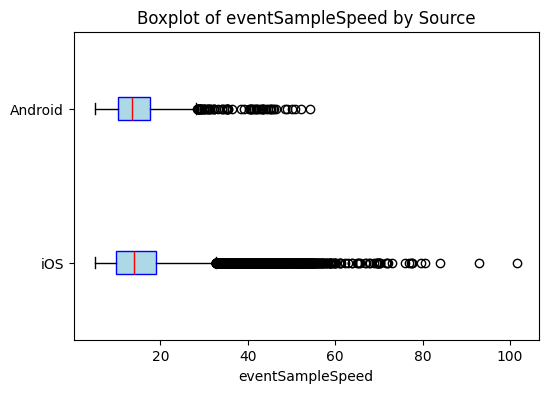

In [24]:
plt.figure(figsize=(6,4))

# Split cleaned data
ios_data = ios_df['eventSampleSpeed']
android_data = android_df['eventSampleSpeed']

# Boxplot
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.title("Boxplot of eventSampleSpeed by Source")
plt.xlabel("eventSampleSpeed")
plt.show()

In [25]:
android_df['eventDurationSeconds'].describe()

count    1148.000000
mean        5.075901
std         2.382449
min         0.941563
25%         3.927584
50%         4.657239
75%         5.753329
max        24.402876
Name: eventDurationSeconds, dtype: float64

In [26]:
ios_df['eventDurationSeconds'].describe()

count    55636.000000
mean         5.011450
std          3.087344
min          0.914496
25%          2.973818
50%          4.704031
75%          6.188969
max         24.980251
Name: eventDurationSeconds, dtype: float64

In [27]:
ios_df['eventMilesDriven'].describe()

count    55636.000000
mean         0.022554
std          0.021654
min          0.000000
25%          0.010364
50%          0.017087
75%          0.027384
max          1.007121
Name: eventMilesDriven, dtype: float64

In [28]:
android_df['eventMilesDriven'].describe()

count    1148.000000
mean        0.020397
std         0.023905
min         0.000263
25%         0.009642
50%         0.014015
75%         0.020560
max         0.165941
Name: eventMilesDriven, dtype: float64

In [29]:
print(ios_df.shape[0] / iOS_raw.shape[0] * 100, "% of data retained after cleaning")
print(android_df.shape[0] / android_raw.shape[0] * 100, "% of data retained after cleaning")

91.06622581595573 % of data retained after cleaning
89.1996891996892 % of data retained after cleaning


In [30]:
# saving into cleaned csv file
ios_df.to_csv(root / "data" / "processed" / "ios.csv", index=False)
android_df.to_csv(root / "data" / "processed" / "android.csv", index=False)

In [31]:
# YIPPEE!!!